In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport 
import pycountry
import plotly.express as px
from wordcloud import WordCloud


In [2]:
df = pd.read_csv("data_TV.csv")
df=pd.DataFrame(df)
df.head(5)

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac..."
2,2021-11-06,US,en,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...
3,2013-12-02,US,en,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...
4,2022-04-14,US,en,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...


In [3]:
profile = ProfileReport(df, title="Summary of Data", html={'style' : {'full_width':True}})
profile.to_file(output_file="file.html") 
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
def findCountryOfficialName (country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return ("Country Not Found!")

df['official_name'] = df.apply(lambda row: findCountryOfficialName(row.origin_country) , axis = 1)
df.head()


,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview,official_name
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...,United States
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac...",United States
2,2021-11-06,US,en,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...,United States
3,2013-12-02,US,en,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...,United States
4,2022-04-14,US,en,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...,United States


In [5]:
df_origin_country_full = df["official_name"].value_counts()
df_origin_country_full

df_country_counts = pd.DataFrame(df_origin_country_full)
df_country_resets = df_country_counts.reset_index()
df_country_resets.columns = ['country_name', 'number_of_shows'] # change column names
df_country_resets


,country_name,number_of_shows
0,United States,1377
1,Japan,393
2,United Kingdom,169
3,Mexico,148
4,Country Not Found!,123
5,"Korea, Republic of",98
6,Colombia,55
7,Spain,49
8,Canada,39
9,Brazil,20


In [8]:
df_origin_country = df["origin_country"].value_counts().head(5)
df_origin_country

df_val_counts = pd.DataFrame(df_origin_country)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['country', 'number_of_shows'] # change column names
df_value_counts_reset


,country,number_of_shows
0,US,1377
1,JP,393
2,GB,169
3,MX,148
4,KR,98


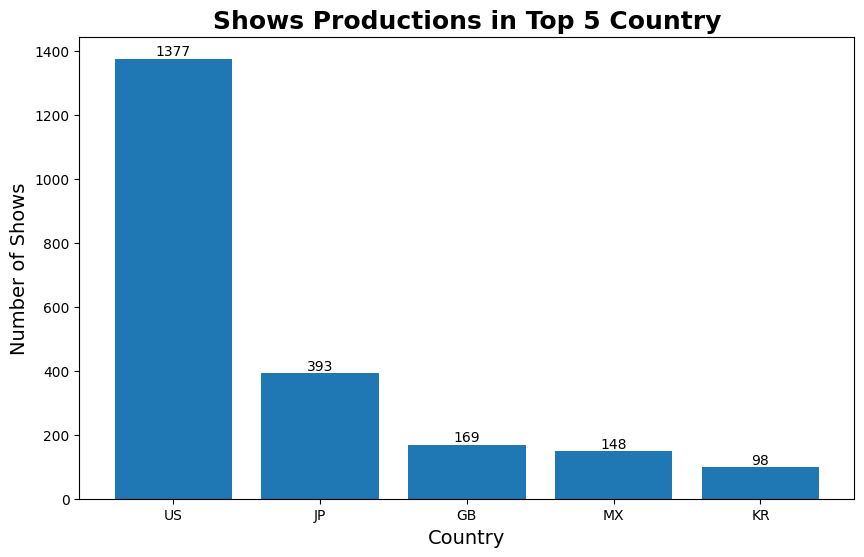

In [10]:
plt.figure(figsize=(10,6))
plt.title("Shows Productions in Top 5 Country", fontsize=18, fontweight="bold")
plt.xlabel("Country",fontsize=14)
plt.ylabel("Number of Shows",fontsize=14)

plots = plt.bar(df_value_counts_reset['country'],df_value_counts_reset['number_of_shows'])
plt.bar_label(plots)
plt.show()



In [16]:
#Popular Shows based on Popularity
popularity_n_votes = df[['name','popularity']].sort_values(by='popularity',ascending=False)
popularity_n_votes.head(20)


,name,popularity
179,House of the Dragon,6684.611
421,Dahmer – Monster: The Jeffrey Dahmer Story,5865.900
1381,The Lord of the Rings: The Rings of Power,4787.462
2416,She-Hulk: Attorney at Law,2493.030
3,Rick and Morty,1511.996
1111,Chucky,1480.652
689,The Walking Dead,1443.081
636,American Horror Story,1193.941
276,Game of Thrones,1063.455
472,Grey's Anatomy,838.791


In [17]:
highest_rate=df[['name','popularity','vote_average']].sort_values(by='vote_average',ascending=False)
highest_rate.head(10)

,name,popularity,vote_average
0,The D'Amelio Show,30.104,9.0
1,Breaking Bad,468.253,8.8
50,SCHOOL-LIVE!,13.735,8.7
57,That Time I Got Reincarnated as a Slime,53.001,8.7
56,My Dress-Up Darling,109.282,8.7
55,Crash Landing on You,45.428,8.7
54,Young Royals,46.599,8.7
53,Hotel Del Luna,32.638,8.7
52,Avatar: The Last Airbender,54.052,8.7
51,Mr. Queen,27.071,8.7


In [33]:
# type(df['first_air_date'])
fig = px.histogram(df['first_air_date'],title="Year of Total Shows Launch",width=800,height=600,labels={ # replaces default labels by column name
                "value": "Year of Launch",  "count": "Total Shows Launched"
            })
fig.show()



In [34]:
more_than_7 = df.loc[df['vote_average'] > 7.0]
less_than_7 = df.loc[df['vote_average'] <= 7.0]

In [38]:
overview=df.overview.astype(str)
type(overview)

pandas.core.series.Series